In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten
from keras.optimizers import Adam
from keras import regularizers
from keras import optimizers
from keras import initializers
from keras.preprocessing import image

import keras.backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [ ]:
%pylab inline
img=mpimg.imread('dataClosedEye/closedEye2.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img.shape

In [ ]:
# Read all data
allDataX = np.zeros((826,260,400))
allDataY = np.zeros(826)

for i in range(346):
    filename = 'dataClosedEye/closedEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)

    allDataX[i] = img
    allDataY[i] = 0

    
for i in range(480):
    filename = 'dataOpenedEye/openedEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    allDataX[i+346] = img
    allDataY[i+346] = 1


In [ ]:
allDataX.shape

In [ ]:
allDataX = reshape(allDataX, (allDataX.shape[0], allDataX.shape[1], allDataX.shape[2], 1))

In [ ]:
allDataX.shape

In [ ]:
allDataY[300]

In [ ]:
Xtrain, Ytrain = shuffle(allDataX, allDataY, random_state=0)
Xvalid = Xtrain[700:]
Xtrain = Xtrain[:700]
Yvalid = Ytrain[700:]
Ytrain = Ytrain[:700]

In [ ]:
def model(Xshape):
    
    mod = Sequential()
    mod.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer='glorot_normal', input_shape=Xshape))
    mod.add(MaxPooling2D(pool_size=(4, 4)))
    
    mod.add(Conv2D(8, (5, 5), activation='relu', kernel_initializer='glorot_normal'))
    mod.add(MaxPooling2D(pool_size=(4, 4)))

    mod.add(Flatten())
#    mod.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.01)))
    mod.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0)))
#    mod.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0)))
    mod.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    return mod

In [ ]:
mymodel = model(Xtrain.shape[1:])
opt = optimizers.Adam(lr=0.0001)#, decay=0.0001)


mymodel.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# First train with small mini batch size and default learning rate
mymodel.fit(Xtrain, Ytrain, epochs = 10, batch_size=32)
# Then train with smaller learning rate and larger batch size
#K.set_value(mymodel.optimizer.lr, 0.001)
#mymodel.fit(xtrain, ylabels, epochs = 10, batch_size=512)
#K.set_value(mymodel.optimizer.lr, 0.0001)
#mymodel.fit(xtrain, ylabels, epochs = 10, batch_size=1024)



In [ ]:
pred = mymodel.evaluate(x = Xvalid, y = Yvalid)
### END CODE HERE ###
print()
print ("Loss = " + str(pred[0]))
print ("Test Accuracy = " + str(pred[1]))

In [ ]:
validPred = mymodel.predict(Xvalid)

In [ ]:
np.where(validPred > 0.5) 

In [ ]:
np.where(Yvalid == 1)

In [ ]:
missed = np.reshape(Xvalid[26], (260,400))
plt.imshow(missed, cmap='gray')
plt.show()

In [2]:
# Read all data
dataOpened = np.zeros((209,260,400))

for i in range(209):
    filename = 'dataJade/jadeEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    dataOpened[i] = img


<IPython.core.display.Javascript object>


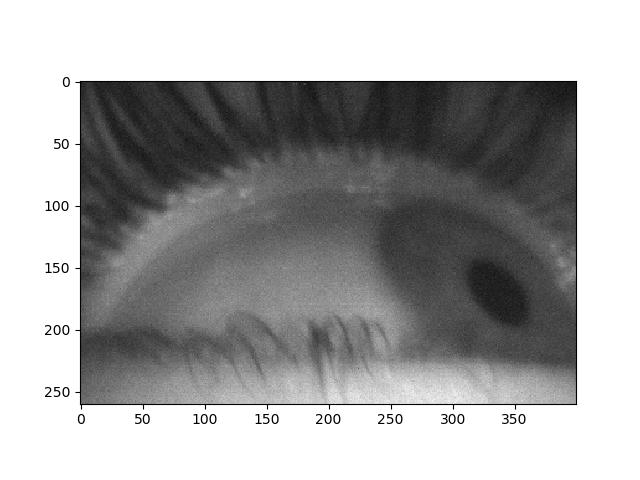

In [45]:
%matplotlib notebook
plt.imshow(dataOpened[208], cmap='gray')
plt.show()